Import packages

In [1]:
import tensorflow  as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os


Import image - shape is (768, 768, 3)

array([[[123,  99,  53],
        [116,  90,  44],
        [118,  85,  39],
        ...,
        [166, 130,  70],
        [167, 131,  71],
        [168, 132,  72]],

       [[124, 100,  54],
        [123,  97,  51],
        [124,  91,  45],
        ...,
        [170, 134,  74],
        [168, 132,  72],
        [168, 132,  72]],

       [[116,  91,  47],
        [119,  93,  47],
        [123,  90,  44],
        ...,
        [173, 137,  77],
        [170, 134,  74],
        [168, 132,  72]],

       ...,

       [[ 33,  46,  30],
        [ 35,  48,  32],
        [ 37,  50,  34],
        ...,
        [175, 172, 157],
        [177, 174, 159],
        [184, 181, 166]],

       [[ 32,  45,  29],
        [ 35,  48,  32],
        [ 38,  51,  35],
        ...,
        [177, 174, 159],
        [178, 175, 160],
        [186, 183, 168]],

       [[ 35,  48,  32],
        [ 37,  50,  34],
        [ 38,  51,  35],
        ...,
        [180, 177, 162],
        [181, 178, 163],
        [189, 186, 171]]], dtype=uint8)
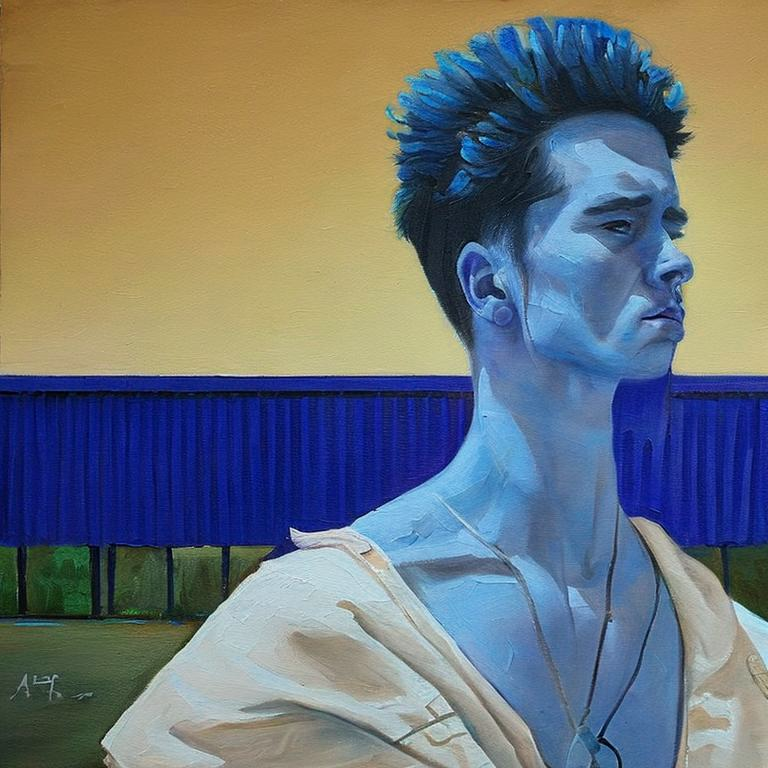

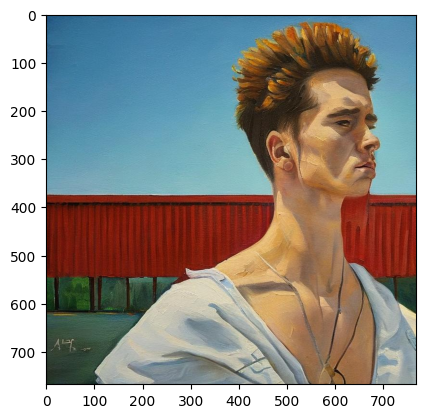

In [2]:
img = image.load_img("/content/drive/MyDrive/basedata/training/ai/ai1.jpg")
plt.imshow(img)
cv2.imread("/content/drive/MyDrive/basedata/training/ai/ai1.jpg")


(768, 768, 3)

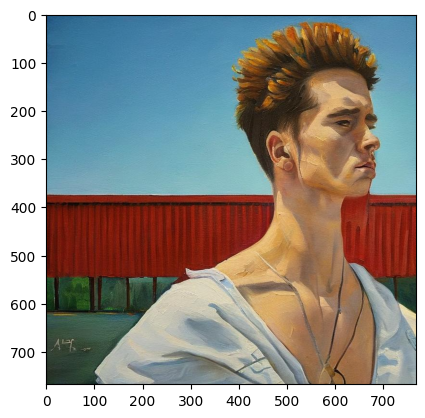

In [3]:
img_png = image.load_img("/content/abbott-handerson-thayer_a-winged-figure-1904 copy.png")
plt.imshow(img_png)
cv2.imread("/content/abbott-handerson-thayer_a-winged-figure-1904 copy.png").shape

Create dataset

In [11]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/basedata/training/",
                                          target_size=(200,200),
                                          batch_size = 3,
                                          class_mode="binary")
validation_dataset = train.flow_from_directory("/content/drive/MyDrive/basedata/validation/",
                                          target_size=(200,200),
                                          batch_size = 3,
                                          class_mode="binary")

Found 36 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


Create model

In [12]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])

Compile model

In [13]:
model.compile(loss = "binary_crossentropy",
              optimizer = RMSprop(lr=0.001),
              metrics= ['accuracy'])



Fit model

In [14]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 30,
                      validation_data = validation_dataset)

Epoch 1/30
3/3 [==============================] - 11s 4s/step - loss: 5.8173 - accuracy: 0.2222 - val_loss: 0.7561 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 3s 1s/step - loss: 0.7879 - accuracy: 0.4444 - val_loss: 0.7275 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 2s 851ms/step - loss: 0.8404 - accuracy: 0.2222 - val_loss: 0.6853 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 2s 769ms/step - loss: 0.7054 - accuracy: 0.4444 - val_loss: 0.6750 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 3s 952ms/step - loss: 0.6160 - accuracy: 0.5556 - val_loss: 0.6534 - val_accuracy: 0.7500
Epoch 6/30
3/3 [==============================] - 4s 2s/step - loss: 0.6617 - accuracy: 0.6667 - val_loss: 0.6674 - val_accuracy: 0.6000
Epoch 7/30
3/3 [==============================] - 3s 948ms/step - loss: 0.6608 - accuracy: 0.7778 - val_loss: 0.6723 - val_accuracy: 0.6500
Epoch 8/30
3/3 [============

- accuracy starts at 0.2222
- Gets to 0.7778 by 7th epoch
- Fluctuates between 0.6667 and 1.0000, ends on 1.0000
- val_accuracy starts at 0.5000, ends at 0.7000

Testing data

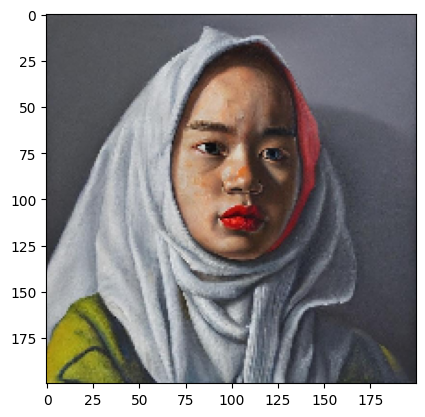

1/1 [==============================] - 0s 204ms/step
not AI


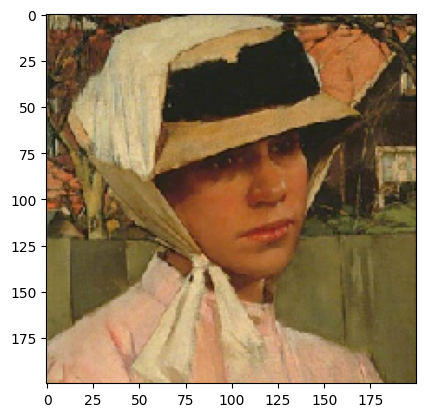

1/1 [==============================] - 0s 42ms/step
not AI


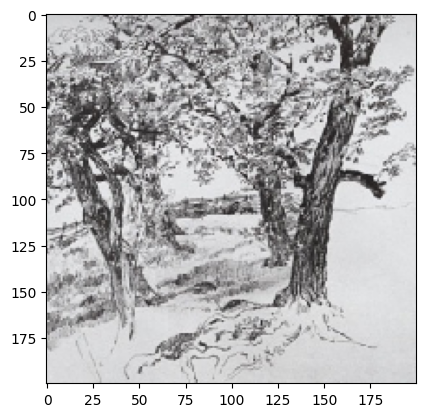

1/1 [==============================] - 0s 105ms/step
not AI


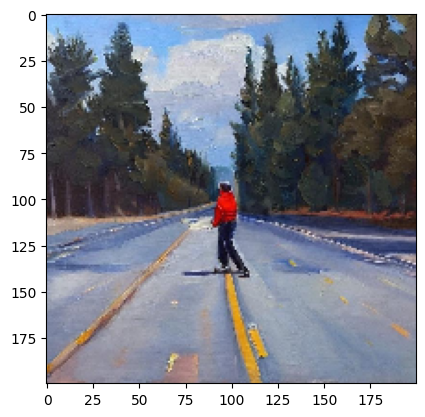

1/1 [==============================] - 0s 74ms/step
not AI


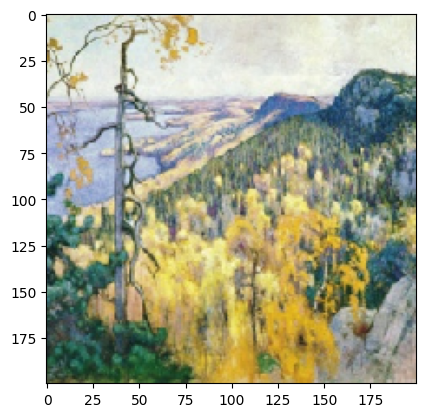

1/1 [==============================] - 0s 75ms/step
AI


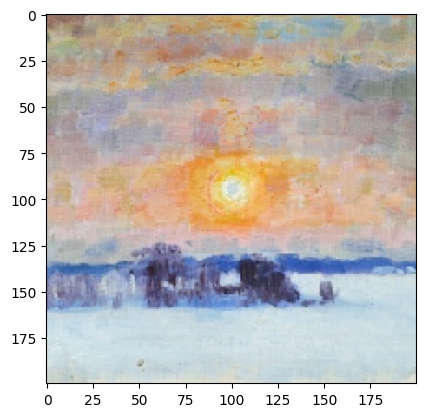

1/1 [==============================] - 0s 44ms/step
not AI


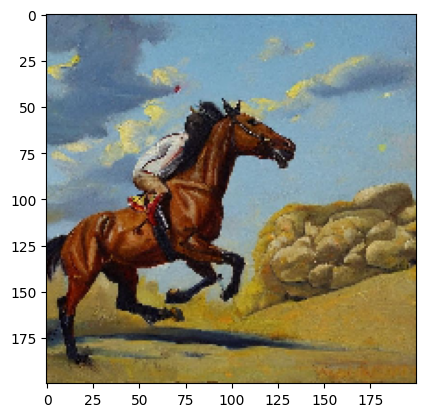

1/1 [==============================] - 0s 45ms/step
AI


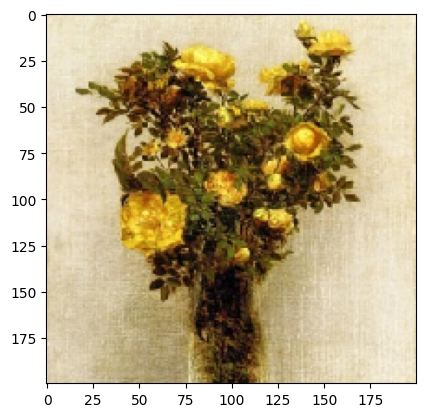

1/1 [==============================] - 0s 69ms/step
not AI


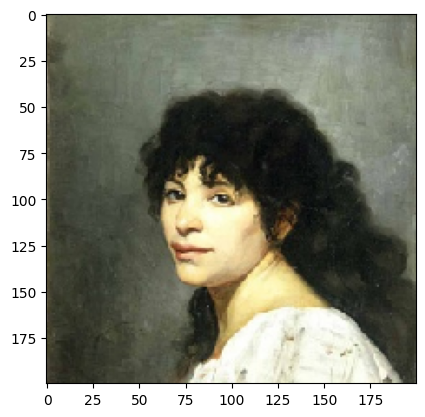

1/1 [==============================] - 0s 43ms/step
AI


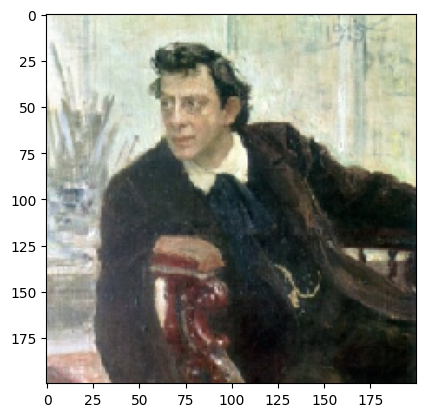

1/1 [==============================] - 0s 50ms/step
not AI


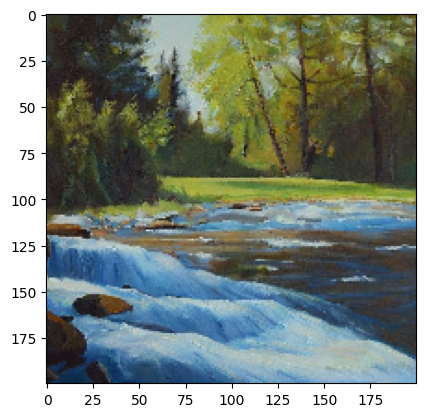

1/1 [==============================] - 0s 73ms/step
not AI


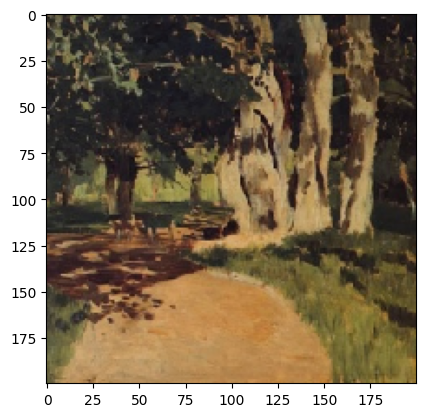

1/1 [==============================] - 0s 44ms/step
not AI


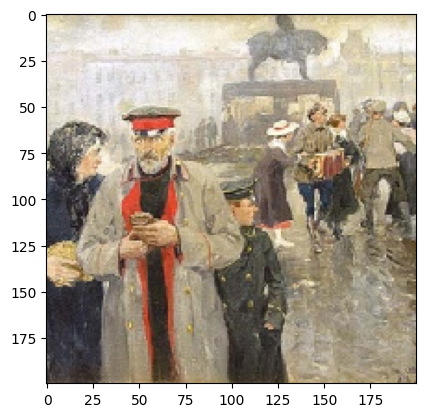

1/1 [==============================] - 0s 64ms/step
not AI


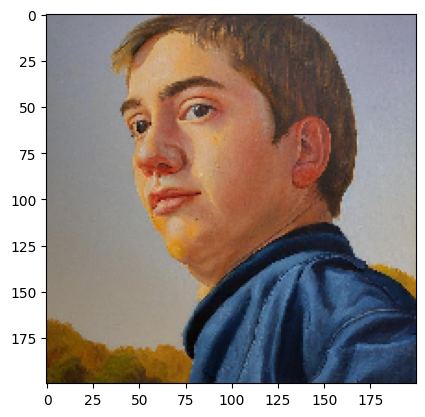

1/1 [==============================] - 0s 68ms/step
not AI


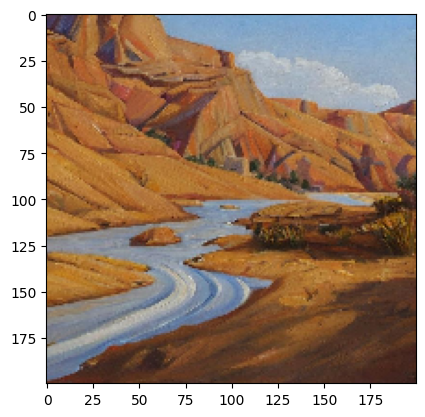

1/1 [==============================] - 0s 87ms/step
not AI


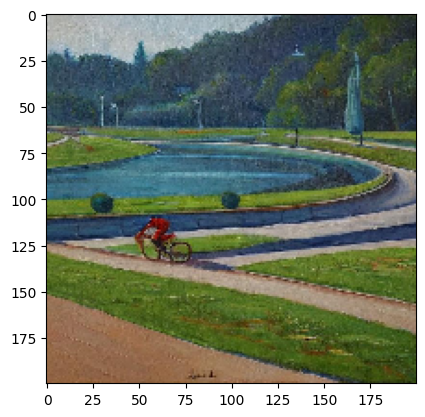

1/1 [==============================] - 0s 71ms/step
AI


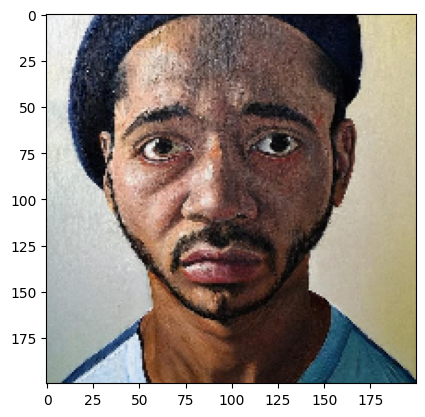

1/1 [==============================] - 0s 108ms/step
not AI


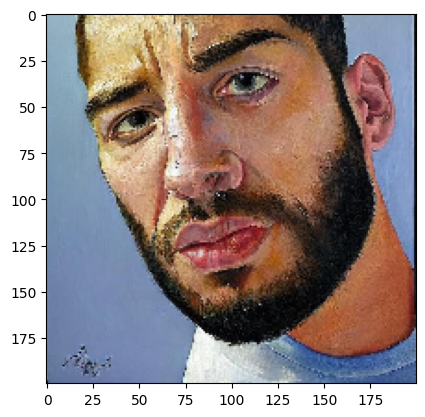

1/1 [==============================] - 0s 92ms/step
not AI


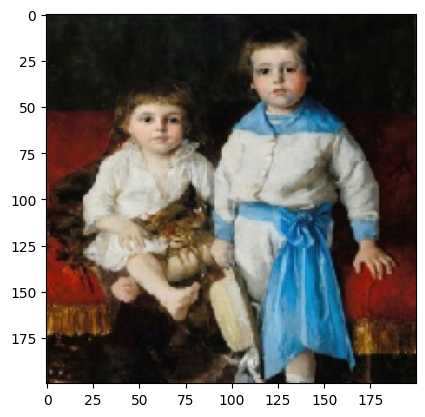

1/1 [==============================] - 0s 99ms/step
AI


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7db72f45eca0>

In [16]:
dir_path = "/content/drive/MyDrive/basedata/testing"

for i in os.listdir(dir_path):
    img =image.load_img(dir_path + "//" + i, target_size=(200,200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print('not AI')
    else:
        print("AI")


- Actual AI, Labeled AI: 2
- Actual AI, Labeled NOT_AI: 7
- Actual NOT_AI, Labeled NOT_AI: 7
- Actual NOT_AI, Labeled AI: 3